In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mp = gpd.read_file('/Users\melis\DataJam2021\chsa_2018\CHSA_2018.shp')
mp.head()

,CHSA_CD,CHSA_Name,CHSA_Title,LHA_CD,LHA_Name,LHA_Title,LHA_CD1997,HSDA_CD,HSDA_ID,HSDA_Name,...,HA_CD,HA_ID,HA_Name,HA_Title,CHSA_UR_Cl,CHSA_Pop16,CHSA_Area,Latitude,Longitude,geometry
0,1110,Fernie,1110 Fernie,111,Fernie,111 Fernie,001,11,11 EK,East Kootenay,...,1,1 IHA,Interior,1 Interior,5 Rural Hub,15531,8043.80,49.417397,-114.917924,"POLYGON ((1865830.694 515343.581, 1861957.658 ..."
1,1120,Cranbrook,1120 Cranbrook,112,Cranbrook,112 Cranbrook,002,11,11 EK,East Kootenay,...,1,1 IHA,Interior,1 Interior,4 Small Urban,26248,4473.71,49.552631,-115.593391,"POLYGON ((1780821.437 628009.063, 1781463.004 ..."
2,1130,Kimberley,1130 Kimberley,113,Kimberley,113 Kimberley,003,11,11 EK,East Kootenay,...,1,1 IHA,Interior,1 Interior,6 Rural,9178,4345.66,49.804307,-116.055836,"POLYGON ((1739680.719 627850.200, 1740369.575 ..."
3,1140,Windermere,1140 Windermere,114,Windermere,114 Windermere,004,11,11 EK,East Kootenay,...,1,1 IHA,Interior,1 Interior,6 Rural,9487,10980.52,50.534955,-115.965026,"POLYGON ((1761595.824 670789.961, 1761658.506 ..."
4,1150,Creston,1150 Creston,115,Creston,115 Creston,005,11,11 EK,East Kootenay,...,1,1 IHA,Interior,1 Interior,6 Rural,12634,3793.89,49.247658,-116.571432,"POLYGON ((1673326.505 550242.393, 1673350.370 ..."


In [3]:
mp['CHSA18_Code'] = mp['CHSA_CD'].astype(str).astype(int)
mp = mp.filter(['CHSA18_Code', 'geometry', 'CHSA_CD'])
mp.head()

,CHSA18_Code,geometry,CHSA_CD
0,1110,"POLYGON ((1865830.694 515343.581, 1861957.658 ...",1110
1,1120,"POLYGON ((1780821.437 628009.063, 1781463.004 ...",1120
2,1130,"POLYGON ((1739680.719 627850.200, 1740369.575 ...",1130
3,1140,"POLYGON ((1761595.824 670789.961, 1761658.506 ...",1140
4,1150,"POLYGON ((1673326.505 550242.393, 1673350.370 ...",1150


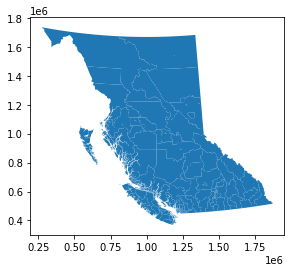

In [4]:
%matplotlib inline
mp.plot()

In [5]:
import pandas as pd
read_file = pd.read_excel('/Users/melis/DataJam2021/Vaccination-rates/data/Vaccination_Data_Weekly/BCCDC_COVID19_LHA_CHSA_Data_Oldest.xlsx')
read_file.to_csv('BCCDC_COVID19_LHA_CHSA_Data_Oldest.csv', index = None, header=True)
CHSA_1 = pd.DataFrame(pd.read_csv('BCCDC_COVID19_LHA_CHSA_Data_Oldest.csv'))

In [6]:
CHSA_1.head()

,CHSA18_Code,CHSA18_Name,C_ADR_7day,C_ADR_8_14day,C_ADR_7day_change,7d_positivity_all,7d_positivity_public,D1_12_coverage,D1_18_coverage,D1_18_49_coverage,D1_50_coverage,D2_12_coverage,D2_18_coverage,D2_18_49_coverage,D2_50_coverage,Health_Authority,Health_Service_Delivery_Area,Local_Health_Area
0,1260,Grand Forks,0,0,0,0,0,71,73,56,81,60,63,40,74,1,12,126
1,1270,Kettle Valley,0,0,0,0,0,63,66,52,72,54,57,38,65,1,12,127
2,1310,Southern Okanagan,3,1,2,2,4,80,82,70,87,66,68,47,77,1,13,131
3,1320,Penticton,3,1,2,4,6,79,80,69,86,69,70,54,80,1,13,132
4,1330,Keremeos,0,0,0,0,0,73,74,64,79,60,62,43,71,1,13,133


In [7]:
# There are 5 main Health Authorities in British Columbia (1-5)
# First number of CHSA18_Code is Health Authority
CHSA_code = CHSA_1['CHSA18_Code']
CHSA_code_str = CHSA_code.astype(str).str[0]

# Add Health Authority Code Column
CHSA_1['Health_Authority'] = CHSA_code_str.astype(int)

# Add Health Authority Name Column
CHSA_1['Health_Authority_Name'] = CHSA_code_str.astype(int)
d = {1: 'Interior', 2: 'Fraser', 3: 'Vancouver Coastal', 4: 'Vancouver Island', 5: 'Northern Island'}
CHSA_1['Health_Authority_Name'] = CHSA_1['Health_Authority_Name'].map(d)

In [8]:
# There are 16 main Health Service Delivery Areas in British Columbia
# First two numbers of CHSA18_Code is Health Service Delivery Area
CHSA_code_str2 = CHSA_code.astype(str).str[0:2]

# Add Health Service Delivery Area Code Column
CHSA_1['Health_Service_Delivery_Area'] = CHSA_code_str2.astype(int)

# Add Health Service Delivery Area Name Column
CHSA_1['Health_Service_Delivery_Area_Name'] = CHSA_code_str2.astype(int)
d = {11: 'East Kootenay', 12: 'Kootenay Boundary', 13: 'Okanagan', 14: 'Thompson Cariboo Shuswap', 21: 'Fraser East', 22: 'Fraser North', 23: 'Fraser South', 31: 'Richmond', 32: 'Vancouver', 33: 'North Shore - Coast Garibaldi', 41: 'South Vancouver Island', 42: 'Central Vancouver Island', 43: 'North Vancouver Island', 51: 'Northwest', 52: 'Northern Interior', 53: 'Northeast'}
CHSA_1['Health_Service_Delivery_Area_Name'] = CHSA_1['Health_Service_Delivery_Area_Name'].map(d)

In [9]:
# There are 89 main Local Health Areas in British Columbia
# First three numbers of CHSA18_Code is Local Health Area
CHSA_code_str3 = CHSA_code.astype(str).str[0:3]

# Add Local Health Area Code Column
CHSA_1['Local_Health_Area'] = CHSA_code_str3.astype(int)

# Add Local Health Area Name Column
d = {111: 'Fernie', 112: 'Cranbrook', 113: 'Kimberley', 114: 'Windermere', 115: 'Creston', 116: 'Golden', 121: 'Kootenay Lake', 122: 'Nelson', 123: 'Castlegar', 124: 'Arrow Lakes', 125: 'Trail', 126: 'Grand Forks', 127: 'Kettle Valley', 131: 'Southern Okanagan', 132: 'Penticton', 133: 'Keremeos', 134: 'Princeton', 135: 'Armstrong-Spallumcheen', 136: 'Vernon', 137: 'Central Okanagan', 138: 'Summerland', 139: 'Enderby', 141: 'Revelstoke', 142: 'Salmon Arm', 143: 'Kamloops', 144: '100 Mile House', 145: 'North Thompson', 146: 'Cariboo-Chilcotin', 147: 'Lillooet', 148: 'South Cariboo', 149: 'Merritt', 211: 'Hope', 212: 'Chilliwack', 213: 'Abbotsford', 214: 'Mission', 215: 'Agassiz-Harrison', 221: 'New Westminster', 222: 'Burnaby', 223: 'Maple Ridge-Pitt Meadows', 224: 'Tri-Cities', 231: 'Langley', 232: 'Delta', 233: 'Surrey', 234: 'South Surrey-White Rock', 311: 'Richmond', 321: 'Vancouver-City Centre', 322: 'Vancouver-Centre North', 323: 'Vancouver-Northeast', 324: 'Vancouver Westside', 325: 'Vancouver-Midtown', 326: 'Vancouver-South', 331: 'North Vancouver', 332: 'West Vancouver-Bowen Island', 333: 'Sunshine Coast', 334: 'Powell River', 335: 'Howe Sound', 336: 'Bella Coola Valley', 337: 'Central Coast', 411: 'Greater Victoria', 412: 'Western Communities', 413: 'Sannich Peninsula', 414: 'Southern Gulf Islands', 421: 'Cowichan Valley South', 422: 'Cowichan Valley West', 423: 'Cowichan Valley North', 424: 'Greater Nanaimo', 425: 'Oceanside', 426: 'Alberni-Clayoquot', 431: 'Comox Valley', 432: 'Greater Campbell River', 433: 'Vancouver Island West', 434: 'Vancouver Island North', 510: 'Haida Gwaii', 511: 'Snow County', 512: 'Prince Rupert', 513: 'Upper Skeena', 514: 'Smithers', 515: 'Kitimat', 516: 'Stikine', 517: 'Terrace', 518: 'Nisgaa', 519: 'Telegraph Creek', 521: 'Quesnel', 522: 'Burns Lake', 523: 'Nechako', 524: 'Prince George', 531: 'Peace River South', 532: 'Peace River North', 533: 'Fort Nelson'}
CHSA_1['Local_Health_Area_Name'] = CHSA_code_str3.astype(int)
CHSA_1['Local_Health_Area_Name'] = CHSA_1['Local_Health_Area_Name'].map(d)

In [10]:
CHSA_1 = CHSA_1.filter(['CHSA18_Code', '7d_positivity_all', 'D2_12_coverage'])
#CHSA_1
#CHSA_1['7d_positivity_all'].value_counts()

In [11]:
#merged = mp.merge(CHSA_1, on='CHSA18_Code')
#merged['Extortion']=merged['Extortion'].fillna(0)
merged = mp.set_index('CHSA18_Code').join(CHSA_1.set_index('CHSA18_Code'))
merged = merged.reset_index(drop=True)
merged['7d_positivity_all'] = merged['7d_positivity_all'].fillna(0).astype(int)
merged['7d_positivity_all'].value_counts()
#merged.to_excel('vaccination_maps.xlsx')

0     111
1      46
2      20
3      14
4       9
9       4
5       3
16      2
15      2
10      2
22      1
19      1
17      1
13      1
8       1
Name: 7d_positivity_all, dtype: int64

In [12]:
#merged.plot()
#merged.plot(column = '7d_positivity_all', cmap='Blues')

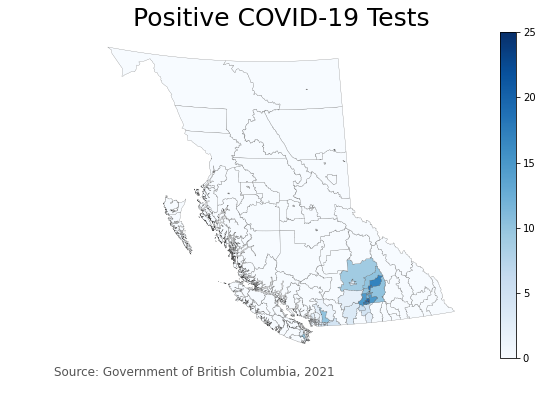

In [13]:
#merged = GeoDataFrame(merged)
vmin, vmax = 0, 25
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='7d_positivity_all', cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.3')
ax.axis('off')
ax.set_title('Positive COVID-19 Tests', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Government of British Columbia, 2021',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

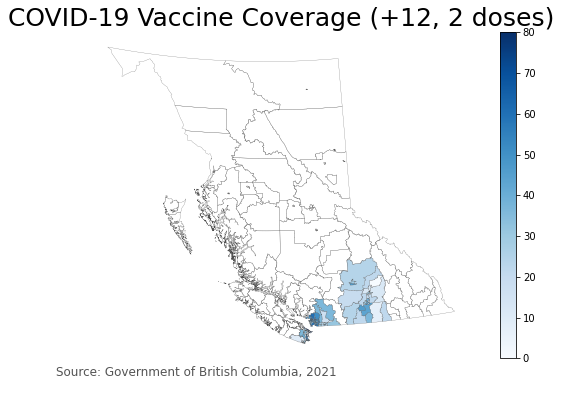

In [14]:
vmin, vmax = 0, 80
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='D2_12_coverage', cmap='Blues', linewidth=0.2, ax=ax, edgecolor='0.3')
ax.axis('off')
ax.set_title('COVID-19 Vaccine Coverage (+12, 2 doses)', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Government of British Columbia, 2021',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)